In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/ASUS/OneDrive/Documents/data science/DS Assignments/simple linear regg/Salary_Data.csv")
df
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis


In [3]:
df.shape

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [41]:
df["Salary"].kurt()

df["YearsExperience"].kurt()


-1.0122119403325072

In [5]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: >

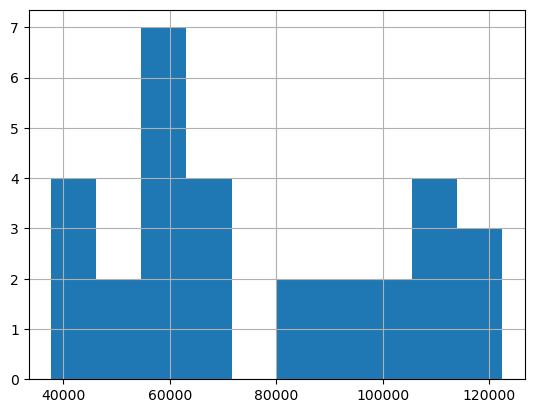

In [7]:
df["Salary"].hist()

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0.5, 0, 'BOX Plot Of Salary')

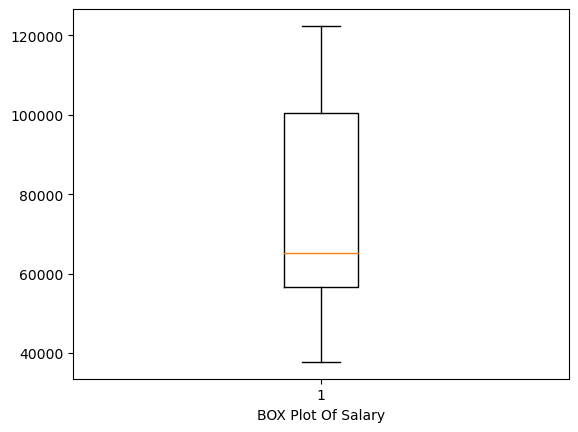

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df["Salary"])
plt.xlabel("BOX Plot Of Salary")

Text(0.5, 0, 'Box Plot For Years of Experience')

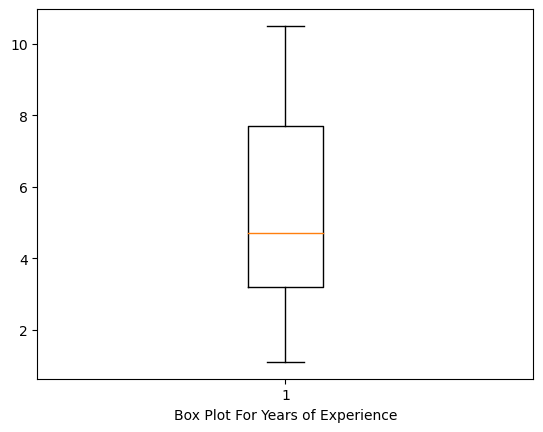

In [13]:
plt.boxplot(df["YearsExperience"])
plt.xlabel("Box Plot For Years of Experience")

### From the above boxplots, we can conclude that there are no outliers present in the dataset and the data is negatively skewed.

Text(0, 0.5, 'Years Experience')

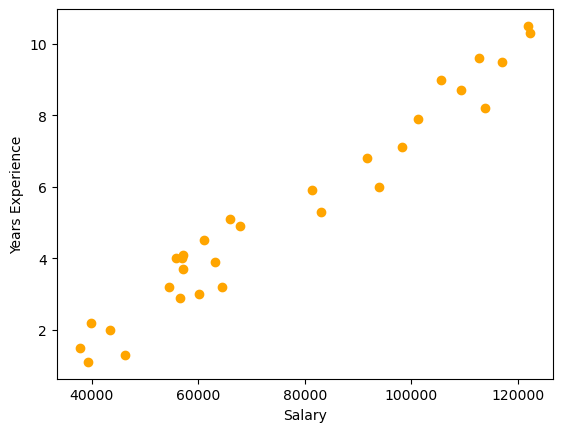

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x= df["Salary"], y = df["YearsExperience"],color = "Orange")
plt.xlabel("Salary")
plt.ylabel("Years Experience")

<Axes: >

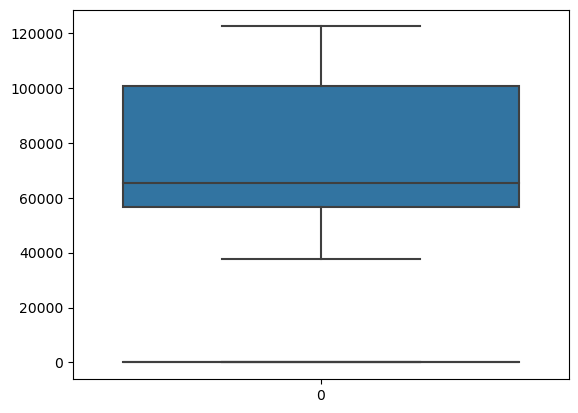

In [15]:
import seaborn as sns
sns.boxplot(df["Salary"])
sns.boxplot(df["YearsExperience"])

Text(0, 0.5, 'Salary')

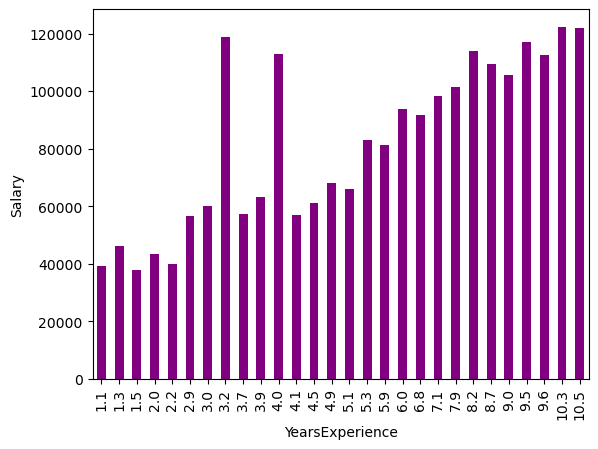

In [16]:

t1 = df.groupby("YearsExperience").sum()
t1["Salary"].plot(kind="bar",color ="purple")
plt.ylabel("Salary")

## Data Transformation

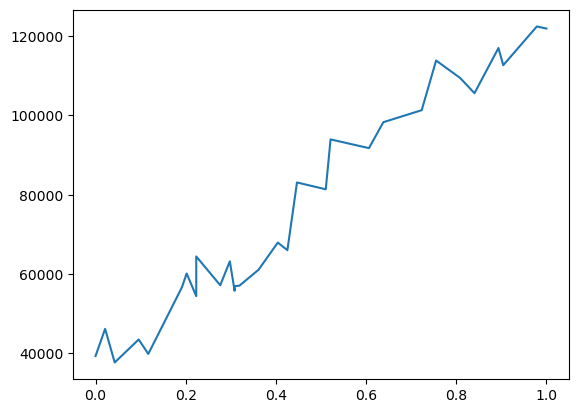

In [17]:
df_ys=df.drop(df.columns[[1]],axis=1)
df_ys
df_ys.shape
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
ss_x = ss.fit_transform(df_ys)
x = pd.DataFrame(ss_x)
x.columns=list(df_ys)
x.head()
y= df["Salary"]
#x= df[["YearsExperience"]]
plt.plot(x,y)

## Model Building

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5,random_state = 12)
x_train.shape
x_test.shape

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_train= lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print(y_pred_train)
print(y_pred_test)
print("The slope of lr",lr.coef_)#B1
print("The intercept of lr ",lr.intercept_)#b0 as lr = b0 + b1x1

[121106.9139691  122986.07307536 108892.37977837  62852.98167485
  51578.02703725 113590.27754403  72248.77720618  61913.40212172
 106073.64111897  43121.81105906  38423.91329339  74127.93631245
  52517.60659039 114529.85709717  61913.40212172]
[ 54396.76569665  98557.00469391  79765.41363124  66611.29988738
  36544.75418713  91040.36826884  45000.97016532  70369.61809991
 101375.7433533   59094.66346232  88221.62960944  54396.76569665
  80704.99318438  34665.59508086  60973.82256858]
The slope of lr [88320.4779945]
The intercept of lr  34665.59508085949


## Evaluating Performance by using Metrics

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
print("The testing mean square error is ",mse.round(2))
print("The testing Root mean square error",np.sqrt(mse.round(2)))

The testing mean square error is  46113502.66
The testing Root mean square error 6790.692354981191


Text(0, 0.5, 'Years of Experience')

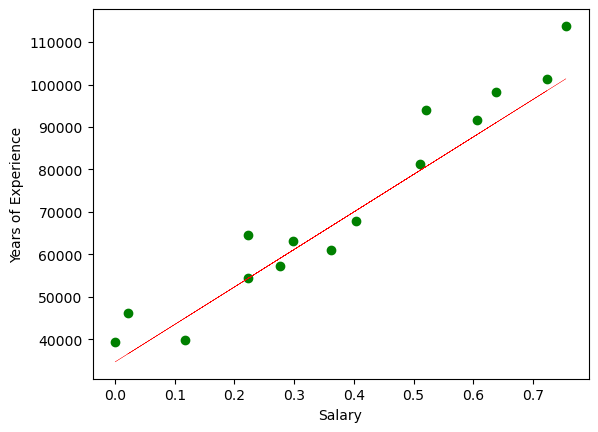

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test,color = "green")
plt.plot(x_test,y_pred_test,color= "red",linewidth= 0.2)
plt.xlabel("Salary")
plt.ylabel("Years of Experience")

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train)
print("R square of training data:", r2.round(3))



R square of training data: 0.975


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_test)
print("R square of test data:", r2.round(3))



R square of test data: 0.911


## Logarithmic Transformation

((array([-1.69372899, -1.22918025, -0.93620006, -0.70737068, -0.51078428,
         -0.33229293, -0.1638693 ,  0.        ,  0.1638693 ,  0.33229293,
          0.51078428,  0.70737068,  0.93620006,  1.22918025,  1.69372899]),
  array([0.04255319, 0.09574468, 0.19148936, 0.20212766, 0.30851064,
         0.30851064, 0.31914894, 0.42553191, 0.44680851, 0.80851064,
         0.84042553, 0.89361702, 0.90425532, 0.9787234 , 1.        ])),
 (0.3511335610808498, 0.5177304964539007, 0.951907334872415))

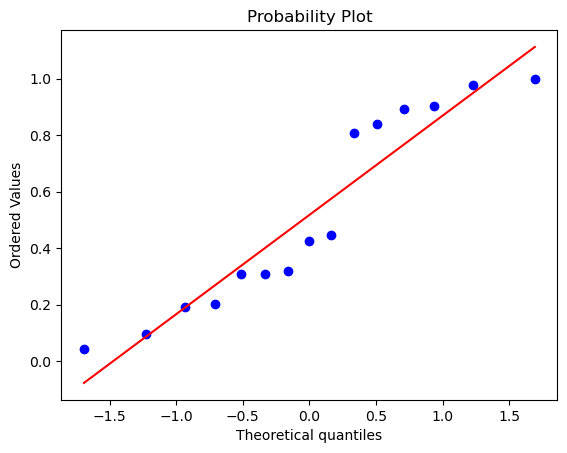

In [24]:
#Applying Data transformation and predicting salary
#step : 1 check whether data is normal distributed by finding skewness or by plotting QQ-plot
import matplotlib.pyplot as plt
from scipy import stats
stats.probplot(x_train["YearsExperience"],dist="norm",plot=plt)

In [25]:
#calculate skewness
x_train["YearsExperience"].skew()
#its positively skewed

0.20574550702738134

In [26]:
#its right skewed ,so apply log transformation on data
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
trf = FunctionTransformer(func= np.log1p)
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_trf,y_train)
y_pred_train_trf= lr.predict(x_train_trf)
y_pred_test_trf = lr.predict(x_test_trf)
print(y_pred_train_trf)
print(y_pred_test_trf)

[118814.69574098 120233.36678467 109203.9295682   65031.98806274
  51531.07568999 112983.23017638  75319.65958478  63957.93783686
 106883.55882716  40419.46326501  33818.87379696  77284.79890769
  52710.14548157 113726.33844016  63957.93783686]
[ 55037.30127994 100489.81618517  83011.3491159   69243.27758303
  31083.83920586  93772.20467321  42970.3972323   73324.96818908
 102923.72810855  60682.59912533  91162.72094635  55037.30127994
  83942.19137918  28291.22072927  62875.11975705]


In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train_trf)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))
mse = mean_squared_error(y_test, y_pred_test_trf)
print("The testing mean square error is ",mse.round(2))
print("The testing Root mean square error",np.sqrt(mse.round(2)))


The training mean square error is  30497138.37
The training Root mean square error 5522.421422709426
The testing mean square error is  53272082.85
The testing Root mean square error 7298.772694775472


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train_trf)
print("R square of training data:", r2.round(3))
r2 = r2_score(y_test,y_pred_test_trf)
print("R square of testing data:", r2.round(3))



R square of training data: 0.966
R square of testing data: 0.898


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6908\3865179132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf)


<Axes: ylabel='Density'>

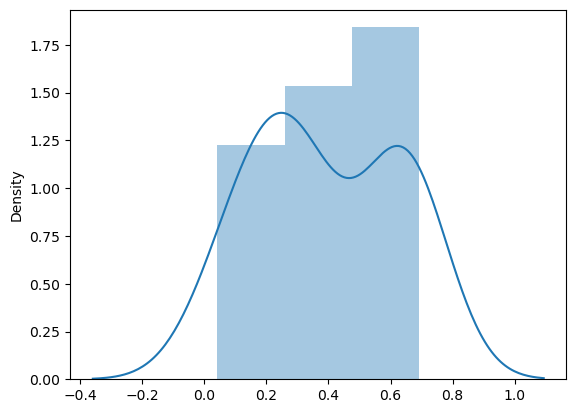

In [30]:
import seaborn as sns
sns.distplot(x_train_trf)

## Square Root Transformation

In [31]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
trf = FunctionTransformer(func= np.sqrt)
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)





In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_trf,y_train)
y_pred_train_trf= lr.predict(x_train_trf)
y_pred_test_trf = lr.predict(x_test_trf)
print(y_pred_train_trf)
print(y_pred_test_trf)

[116554.54807972 117778.8812403  108248.78488424  67975.91657053
  53399.3323468  111518.78006793  77980.22937085  66888.96698095
 106236.93507248  38727.63434314  26920.76357531  79824.28994556
  54771.97855606 112160.99198517  66888.96698095]
[ 57412.90105379 100668.97260721  85107.42223277  72152.31751552
  20004.4588087   94762.6497489   42465.98232475  76089.4615321
 102793.48348192  63510.48647928  92446.9415354   57412.90105379
  85955.11741446   3307.02203965  65783.10966676]


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train_trf)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))
mse = mean_squared_error(y_test, y_pred_test_trf)
print("The test mean square error is ",mse.round(2))
print("The test Root mean square error",np.sqrt(mse.round(2)))

The training mean square error is  51420017.12
The training Root mean square error 7170.775210533377
The test mean square error is  166484005.58
The test Root mean square error 12902.868114492994


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train_trf)
print("R square of training data:", r2.round(3))
r2 = r2_score(y_test,y_pred_test_trf)
print("R square of testing data:", r2.round(3))


R square of training data: 0.942
R square of testing data: 0.68


## Square Transformation

In [35]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
trf = FunctionTransformer(func= np.square)
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)





In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_trf,y_train)
y_pred_train_trf= lr.predict(x_train_trf)
y_pred_test_trf = lr.predict(x_test_trf)
print(y_pred_train_trf)
print(y_pred_test_trf)

[125432.6814472  128712.2716875  105834.48493055  58747.67989437
  53669.60468358 113019.60870971  64918.95185193  58227.52982938
 101734.99713017  51527.29170403  50954.24502225  66364.79271056
  53995.80048705 114509.53008232  58227.52982938]
[54701.08871077 91578.84670859 71125.48822068 61004.60221028
 50848.4517887  82551.15744496 51879.93581589 63543.63981568
 95255.16157474 56772.87286795 79456.70536338 54701.08871077
 71980.65019194 50813.18737751 57725.01196998]


In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train_trf)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))
mse = mean_squared_error(y_test, y_pred_test_trf)
print("The testing mean square error is ",mse.round(2))
print("The testing Root mean square error",np.sqrt(mse.round(2)))

The training mean square error is  47417139.83
The training Root mean square error 6886.0104436458705
The testing mean square error is  124364053.32
The testing Root mean square error 11151.86322190153


In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train_trf)
print("R square of training data:", r2.round(3))
r2 = r2_score(y_test,y_pred_test_trf)
print("R square of testing data:", r2.round(3))


R square of training data: 0.947
R square of testing data: 0.761


# Therefore, From above transformations we can conclude the rmse and r2_score :



###Logarithmic Transformation:    

The training mean square error is  30497138.37
The training Root mean square error 5522.421422709426
The testing mean square error is  53272082.85
The testing Root mean square error 7298.772694775472
R square of training data: 0.966
R square of testing data: 0.898


###SQRT Transformation:
The training mean square error is  51420017.12
The training Root mean square error 7170.775210533377
The test mean square error is  166484005.58
The test Root mean square error 12902.868114492994
R square of training data: 0.942
R square of testing data: 0.68


###SQUARE Transformation:
The training mean square error is  47417139.83
The training Root mean square error 6886.0104436458705
The testing mean square error is  124364053.32
The testing Root mean square error 11151.86322190153
R square of training data: 0.947
R square of testing data: 0.761